**Question 1**

(a) Sequence: $(1 + 0.005)^{-2^k}$, $k = 0, 1, 2, \ldots$



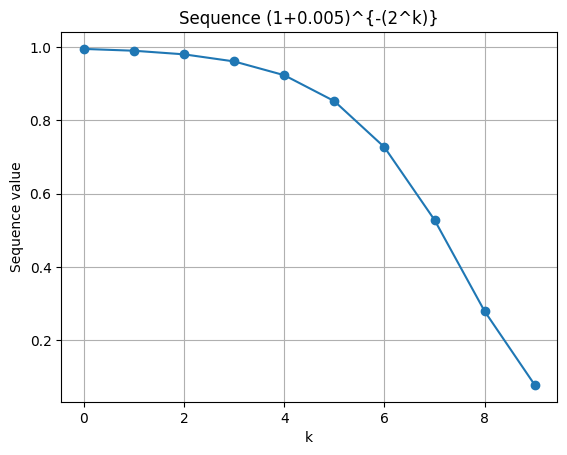

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k_values = np.arange(0, 10)
sequence = (1 + 0.005) ** -(2**k_values)

plt.plot(k_values, sequence, marker='o')
plt.xlabel('k')
plt.ylabel('Sequence value')
plt.title('Sequence (1+0.005)^{-(2^k)}')
plt.grid(True)
plt.show()

(b) Sequence: $1 + (0.005)^k$, $k = 0, 1, 2, \ldots$


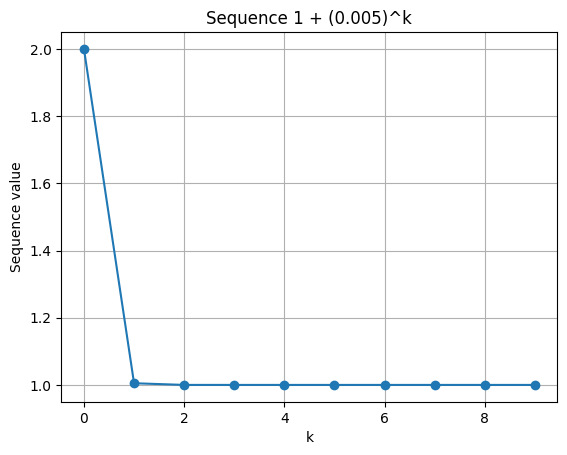

In [ ]:
k_values = np.arange(0, 10)
sequence = 1 + (0.005) ** k_values

plt.plot(k_values, sequence, marker='o')
plt.xlabel('k')
plt.ylabel('Sequence value')
plt.title('Sequence 1 + (0.005)^k')
plt.grid(True)
plt.show()


(c) Sequence: $1 + (0.005)^{-k}$, $k = 0, 1, 2, \ldots$

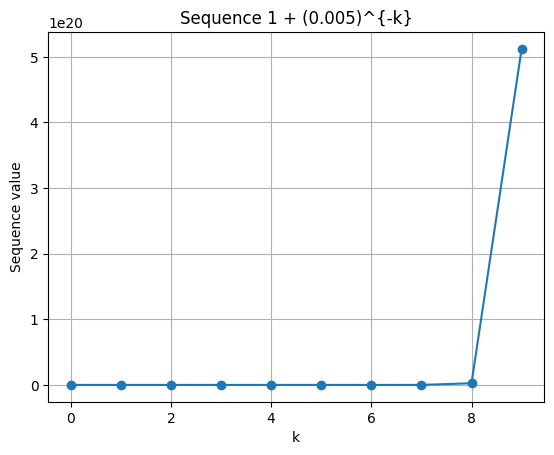

In [ ]:
k_values = np.arange(0, 10)
sequence = 1 + (0.005) ** (-k_values)

plt.plot(k_values, sequence, marker='o')
plt.xlabel('k')
plt.ylabel('Sequence value')
plt.title('Sequence 1 + (0.005)^{-k}')
plt.grid(True)
plt.show()


(d) Sequence: $1 + (k)^{-k}$, $k = 0, 1, 2, \ldots$

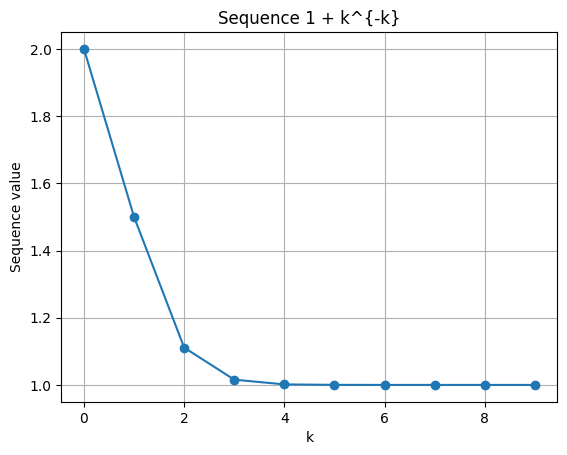

In [ ]:
k_values = np.arange(0, 10)
sequence = 1 + 1 / np.power(k_values + 1, k_values)

plt.plot(k_values, sequence, marker='o')
plt.xlabel('k')
plt.ylabel('Sequence value')
plt.title('Sequence 1 + k^{-k}')
plt.grid(True)
plt.show()


**Question 2**

In [ ]:
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Initialize random number generator for replication
np.random.seed(1000)

In [ ]:
# Step 3: Create dataset A of 1000 data points, each of dimension 10
A = np.random.randn(1000, 10)

In [ ]:
# Step 4: Create z as per the given conditions
z = np.zeros((10, 1))
for i in range(10):
    if i % 2 == 0:
        z[i] = np.random.uniform(i, i+1)
    else:
        z[i] = np.random.uniform(-(i+1), -1)

In [ ]:
# Step 5: Create random vector e of size 1000 x 1
e = np.random.randn(1000, 1)

In [ ]:
# Step 6: Compute y = A * z + e
y = np.dot(A, z) + e

**3. With a starting point x0 =[0 0 . . . 0]⊤∈ R
10, solve problem (1) using Newton’s method implemented
with backtracking line search (use α0 = 0.99, ρ = 0.5, γ = 0.5 for backtracking line search, and τ = 10−4
).
Comment on difficulties (if any) you face when computing the inverse of Hessian (recall that you need to use an
appropriate Python function to compute the inverse of the Hessian). If you face difficulty in computing inverse
of Hessian, try to think of some remedy so that you can avoid the issue.**

In [47]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random
random.seed(1000)

In [48]:
def evalf(A,x,y,n_feat, n):
  assert type(A) is np.ndarray and A.shape == (n, n_feat)
  assert type(x) is np.ndarray and x.shape == (n_feat,1)
  assert type(y) is np.ndarray and y.shape == (n,1)
  assert type(n_feat) is int and n_feat >0
  assert type(n) is int and n >0

  f = np.matmul(A,x) - y

  return 0.5*(np.linalg.norm(f))**2


def evalg(A,x,y,n_feat, n):
  assert type(A) is np.ndarray and A.shape == (n, n_feat)
  assert type(x) is np.ndarray and x.shape == (n_feat,1)
  assert type(y) is np.ndarray and y.shape == (n,1)
  assert type(n_feat) is int and n_feat >0
  assert type(n) is int and n >0

  d = np.matmul(A,x) - y
  g = np.matmul(A.T , d)

  return g



def evalh(A,x,y,n_feat, n):
  assert type(A) is np.ndarray and A.shape == (n, n_feat)
  assert type(x) is np.ndarray and x.shape == (n_feat,1)
  assert type(y) is np.ndarray and y.shape == (n,1)
  assert type(n_feat) is int and n_feat >0
  assert type(n) is int and n >0

  h = np.matmul(A.T , A)

  return h



def compute_steplength_backtracking_scaled_direction(A,x,y, n_feat, n ,gradf, direction, alpha_start, rho, gamma): #add appropriate arguments to the function
  assert type(x) is np.ndarray and x.shape == (n_feat,1)
  assert type(gradf) is np.ndarray and gradf.shape == (n_feat,1)
  assert type(direction) is np.ndarray and direction.shape == (n_feat, n_feat)
  assert type(alpha_start) is float and alpha_start>=0.
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.

  alpha = alpha_start
  p = -gradf

  while (evalf(A, x + alpha*np.matmul(direction,p), y, n_feat, n) > (evalf(A,x,y,n_feat,n) + gamma * alpha * np.matmul(gradf.T, np.matmul(direction, p))) ):
    alpha = alpha*rho

  return alpha


#line search type
CONSTANT_STEP_LENGTH = 3
BACKTRACKING_LINE_SEARCH = 2
EXACT_LINE_SEARCH = 1



def find_minimizer_Newtonmethod(A, start_x, y, n_feat,  n, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size n, tol denotes the tolerance and is a positive float value
  assert type(A) is np.ndarray and A.shape == (n, n_feat)
  assert type(start_x) is np.ndarray and start_x.shape == (n_feat,1)
  assert type(y) is np.ndarray and y.shape == (n,1)
  assert type(n_feat) is int and n_feat >0
  assert type(n) is int and n >0
  assert type(tol) is float and tol>=0

  x = start_x
  g_x = evalg(A,x,y,n_feat,n)


  if line_search_type == BACKTRACKING_LINE_SEARCH:
    if args is None:
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any args. Please check!'
      raise ValueError(err_msg)
    elif len(args)<3 :
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three args. Please check!'
      raise ValueError(err_msg)
    else:
      alpha_start = float(args[0])
      rho = float(args[1])
      gamma = float(args[2])
  k = 0
  x_k = []

  #print('iter:',k,  ' f(x):', evalf(x,n), ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol):

    d = np.linalg.inv(evalh(A,x,y,n_feat,n))

    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(A,x,y,n_feat,n,g_x, d , alpha_start,rho, gamma)

    elif line_search_type == CONSTANT_STEP_LENGTH:
      step_length = 1.0

    else:
      raise ValueError('Line search type unknown. Please check!')

    x = np.subtract(x, step_length * np.matmul(d,g_x))
    k += 1
    x_k.append(x)
    g_x = evalg(A,x,y,n_feat,n)

  return x, k, x_k



def find_minimizer_BGFS(A, start_x, y, n_feat, n, tol,line_search_type,*args):
  assert type(A) is np.ndarray and A.shape == (n, n_feat)
  assert type(start_x) is np.ndarray and start_x.shape == (n_feat,1)
  assert type(y) is np.ndarray and y.shape == (n,1)
  assert type(n_feat) is int and n_feat >0
  assert type(n) is int and n >0
  assert type(tol) is float and tol>=0


  x = start_x
  k = 0
  g_new = evalg(A,x,y,n_feat,n)
  B = np.identity(n_feat)
  x_k = []

  if line_search_type == BACKTRACKING_LINE_SEARCH:
    if args is None:
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any args. Please check!'
      raise ValueError(err_msg)
    elif len(args)<3 :
      err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three args. Please check!'
      raise ValueError(err_msg)
    else:
      alpha_start = float(args[0])
      rho = float(args[1])
      gamma = float(args[2])

  while (np.linalg.norm(g_new) > tol):

    d = B

    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(A,x,y,n_feat,n ,g_new, d , alpha_start,rho, gamma)

    elif line_search_type == CONSTANT_STEP_LENGTH:
      step_length = 1.0

    else:
      raise ValueError('Line search type unknown. Please check!')

    g_old = evalg(A,x,y,n_feat,n)
    p = np.matmul(-1*B, g_old)
    x = x + step_length * p
    s = step_length * p
    g_new = evalg(A,x,y,n_feat,n)
    y_k = g_new - g_old

    mu = 1 / (np.matmul(y_k.T,s))
    term1 = np.identity(n_feat) - mu * np.matmul(s,y_k.T)
    term2 = np.identity(n_feat) - mu * np.matmul(y_k, s.T)

    B = np.matmul(term1, np.matmul(B ,term2))  +  mu * np.matmul(s,s.T)

    k = k + 1
    x_k.append(x)


  return x, k, x_k



In [49]:
A = np.random.randn(1000, 10)
z = np.zeros((10, 1))
for i in range(10):
    if i % 2 == 0:
        z[i] = np.random.uniform(i, i+1)
    else:
        z[i] = np.random.uniform(-(i+1), -1)


e = np.random.randn(1000, 1)
y = np.dot(A, z) + e

**• Let x*
be the final optimal solution provided by your algorithm. Report the values of x* and x_bar, and discuss
the observations.**

In [50]:


my_x = np.array([0 for i in range(10)]).reshape((10, 1))
my_tol = 10e-5
alpha = 0.9
rho = 0.5
gamma = 0.5

x_opt , k_opt , x_k_arr = find_minimizer_Newtonmethod(A, my_x, y, 10, 1000, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, gamma)


print('Using newtons method with Backtracking :- ')
print('\n')

print('Optimal Value of x :', x_opt.T)
print('Original x_bar :', z.T)
print('Value at optimum x :', evalf(A,x_opt,y,10,1000))
print('No. of iterations :', k_opt)

Using newtons method with Backtracking :- 


Optimal Value of x : [[ 0.95017747 -1.04810257  2.65701808 -2.22538762  4.28823805 -1.36072504
   6.37120641 -6.82269763  8.777788   -9.9415331 ]]
Original x_bar : [[ 0.93741295 -1.05692928  2.65849448 -2.25242154  4.24052427 -1.32437653
   6.38106906 -6.82272688  8.7820036  -9.9980043 ]]
Value at optimum x : 505.64732952455125
No. of iterations : 9


**This is a regression problem where we have been given a function y which depend on x. The original value or the paramerter is x_bar. Here in this problem we are trying to estimate that parameter as best as possible. for that we try to minimize the square erros loss function that is the f(x) in our case to find the weights x such that we estimate it as close as possible.**

**The observation is that we estimated the value of x, and it lies very close to the true value x_bar**

**• Plot the values log(∥x
k − x
∗∥2) against iterations k = 0, 1, 2, . . ..**

**• Prepare a different plot for plotting log(|f(xk) − f(x∗)|) obtained from
Newton’s method against the iterations.**


<ipython-input-51-0318ee11da77>:5: RuntimeWarning: divide by zero encountered in log
  log_norm.append(np.log(np.linalg.norm(xk - x_opt)))
<ipython-input-51-0318ee11da77>:6: RuntimeWarning: divide by zero encountered in log
  log_norm_fx.append(np.log(np.abs(evalf(A,xk,y,10,1000) - evalf(A,x_opt,y,10,1000) )))


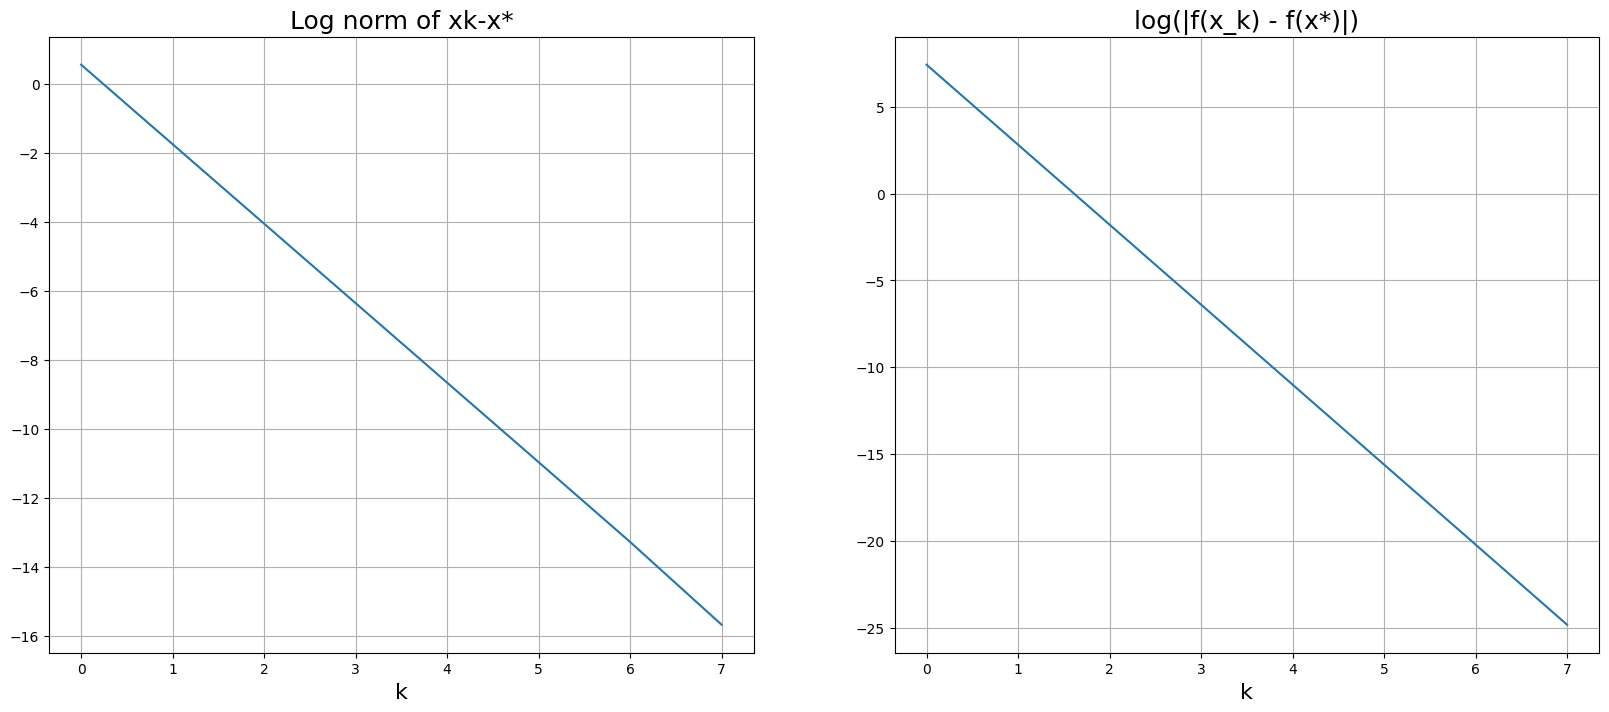

In [51]:


log_norm = []
log_norm_fx = []

for xk in x_k_arr:
  log_norm.append(np.log(np.linalg.norm(xk - x_opt)))
  log_norm_fx.append(np.log(np.abs(evalf(A,xk,y,10,1000) - evalf(A,x_opt,y,10,1000) )))


fig, ax = plt.subplots(1,2,figsize= (20,8))
ax[0].plot(np.arange(len(x_k_arr)),log_norm, label='log(||x_k - x*||)')
ax[0].set_title('Log norm of xk-x*', fontsize = 18)
ax[0].set_xlabel('k', fontsize = 16)
ax[0].grid(True)

ax[1].plot(np.arange(len(x_k_arr)),log_norm_fx, label='log(||f(x_k) - f(x*)||')
ax[1].set_title('log(|f(x_k) - f(x*)|)', fontsize = 18)
ax[1].set_xlabel('k', fontsize = 16)
ax[1].grid(True)

**We observe that the convergence is linear as the line shows**

**• Let x
∗
be the final optimal solution provided by BFGS algorithm. Report the values of x
∗ and x¯, and
discuss the observations.**

In [52]:

my_x = np.array([0 for i in range(10)]).reshape((10, 1))
my_tol = 10e-5
alpha = 0.9
rho = 0.5
gamma = 0.5

x_opt , k_opt , x_k_arr = find_minimizer_BGFS(A, my_x, y, 10, 1000, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, gamma)


print('Using BGFS method with Backtracking :- ')
print('\n')

print('Optimal Value of x :', x_opt.T)
print('Original x_bar :', z.T)
print('Value at optimum x :', evalf(A,x_opt,y,10,1000))
print('No. of iterations :', k_opt)

Using BGFS method with Backtracking :- 


Optimal Value of x : [[ 0.95017747 -1.04810257  2.65701808 -2.22538763  4.28823805 -1.36072504
   6.37120641 -6.82269763  8.777788   -9.9415331 ]]
Original x_bar : [[ 0.93741295 -1.05692928  2.65849448 -2.25242154  4.24052427 -1.32437653
   6.38106906 -6.82272688  8.7820036  -9.9980043 ]]
Value at optimum x : 505.6473295245515
No. of iterations : 20


**• Plot the values log(∥x
k − x
∗∥2) against iterations k = 0, 1, 2, . . ..**

**• Prepare a different plot for plotting log(|f(x
k
)−f(x
∗
)|) obtained from BFGS method against the iterations.**

<ipython-input-53-6557e2b6ab9d>:5: RuntimeWarning: divide by zero encountered in log
  log_norm.append(np.log(np.linalg.norm(xk - x_opt)))
<ipython-input-53-6557e2b6ab9d>:6: RuntimeWarning: divide by zero encountered in log
  log_norm_fx.append(np.log(np.abs(evalf(A,xk,y,10,1000) - evalf(A,x_opt,y,10,1000) )))


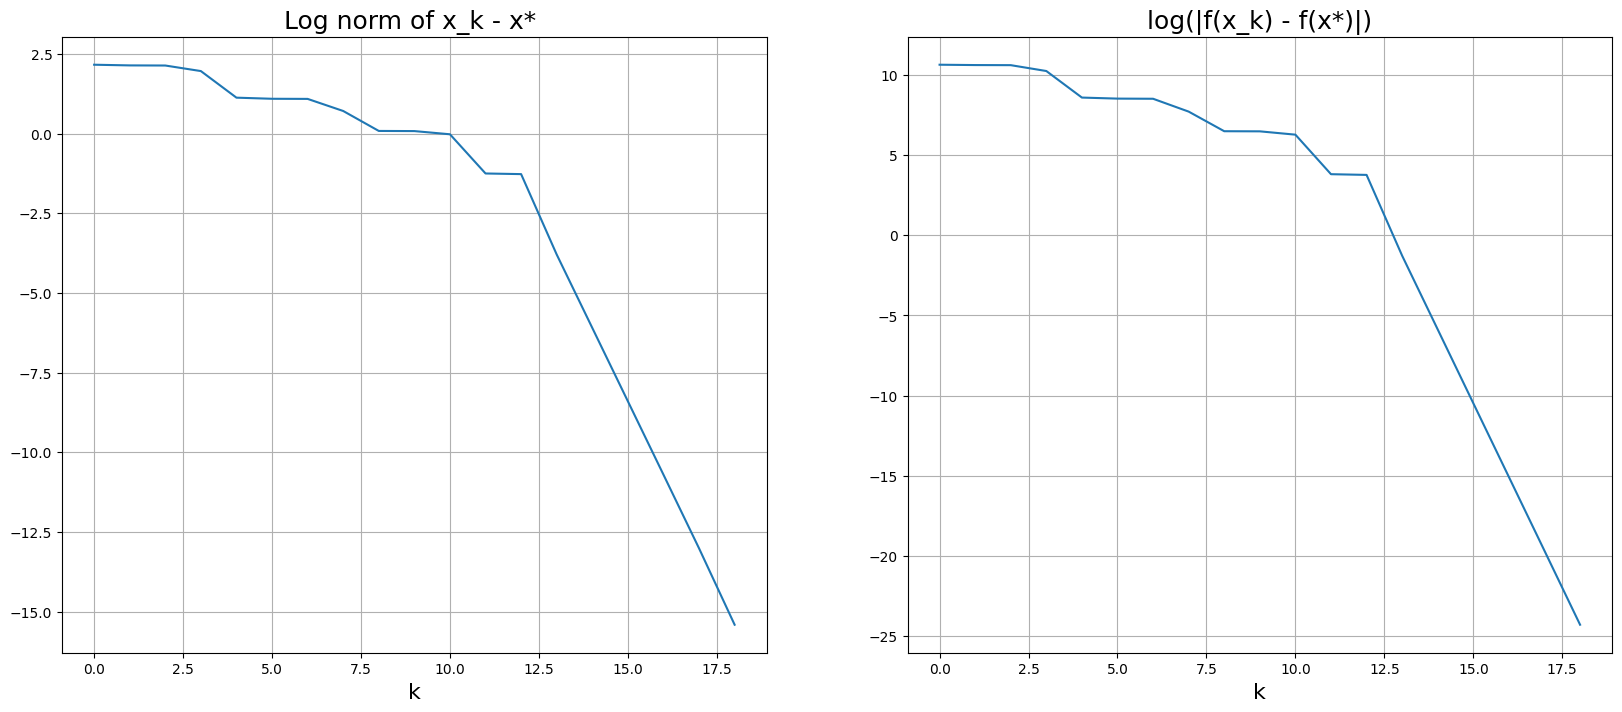

In [53]:
log_norm = []
log_norm_fx = []

for xk in x_k_arr:
  log_norm.append(np.log(np.linalg.norm(xk - x_opt)))
  log_norm_fx.append(np.log(np.abs(evalf(A,xk,y,10,1000) - evalf(A,x_opt,y,10,1000) )))


fig, ax = plt.subplots(1,2,figsize= (20,8))
ax[0].plot(np.arange(len(x_k_arr)),log_norm, label='log(||x_k - x*||)')
ax[0].set_title('Log norm of x_k - x* ', fontsize = 18)
ax[0].set_xlabel('k', fontsize = 16)
ax[0].grid(True)

ax[1].plot(np.arange(len(x_k_arr)),log_norm_fx, label='log(|f(x_k) - f(x*)|)')
ax[1].set_title('log(|f(x_k) - f(x*)|)', fontsize = 18)
ax[1].set_xlabel('k', fontsize = 16)
ax[1].grid(True)


**Number of iterations taken by BFGS is more than the newtons methids, we have used backtracking line search algorith in both the problems.We also observe that the rate of convergence was linear decreasing in newtons methos but in bfgs we seea a small curva before falling.**